In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [3]:
ssn = pd.read_csv('sunspot.csv')

ssn['date'] = pd.to_datetime(ssn[['year', 'month']].assign(DAY=1))
ssn = ssn.drop(columns=['year', 'month'], axis=1)
ssn.head()

,ssn,date
0,135.9,1749-07-01
1,137.9,1749-08-01
2,140.2,1749-09-01
3,143.8,1749-10-01
4,146.4,1749-11-01


In [4]:
tsi = pd.read_csv('tsi.csv')

tsi['date'] = pd.to_datetime(tsi[['year', 'month']].assign(DAY=1))
tsi = tsi.drop(columns=['year', 'month'], axis=1)
tsi.head()

,tsi,date
0,1363.841413,1947-08-01
1,1363.860329,1947-09-01
2,1363.898601,1947-10-01
3,1363.917975,1947-11-01
4,1363.884501,1947-12-01


In [5]:
ssn_tsi = pd.merge(ssn, tsi, on='date', how='inner')
ssn_tsi.head()

,ssn,date,tsi
0,210.9,1947-08-01,1363.841413
1,206.0,1947-09-01,1363.860329
2,206.3,1947-10-01,1363.898601
3,207.1,1947-11-01,1363.917975
4,205.7,1947-12-01,1363.884501


In [6]:
scaler = MinMaxScaler()

In [7]:
ssn_tsi[['ssn', 'tsi']] = scaler.fit_transform(ssn_tsi[['ssn', 'tsi']])
ssn_tsi.head()

,ssn,date,tsi
0,0.738347,1947-08-01,0.762371
1,0.721045,1947-09-01,0.777519
2,0.722105,1947-10-01,0.808167
3,0.724929,1947-11-01,0.823682
4,0.719986,1947-12-01,0.796876


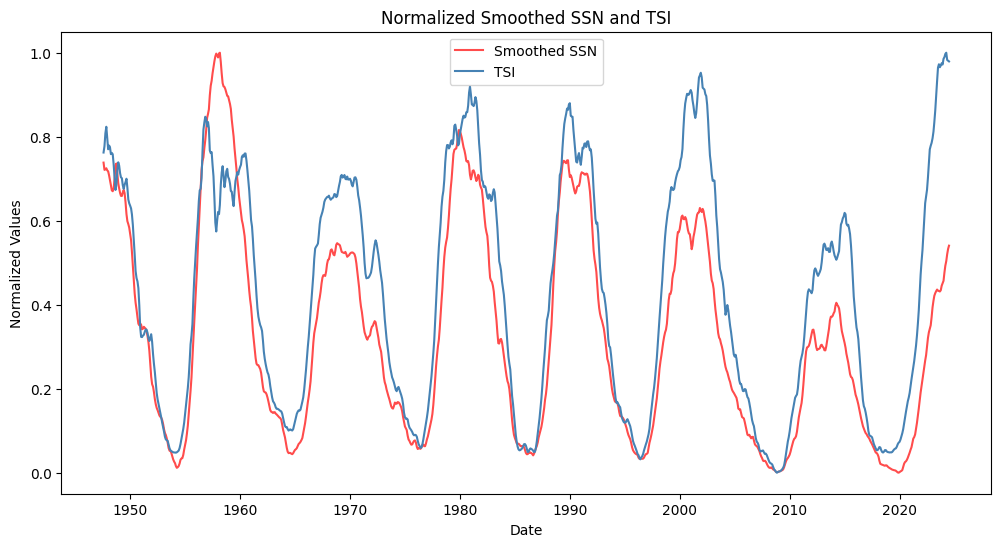

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(ssn_tsi['date'], ssn_tsi['ssn'], label='Smoothed SSN', color='red', alpha=0.7)
plt.plot(ssn_tsi['date'], ssn_tsi['tsi'], label='TSI', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.title('Normalized Smoothed SSN and TSI')
plt.legend()
plt.show()